In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cmath
from qutip import *

In [6]:
%matplotlib

Using matplotlib backend: TkAgg


In [10]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : tuple of integers, optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: 

In [19]:
def myplotwigner(psi, xrange = [0,3], yrange = [-20,20], step = 0.1, title = 'Wigner Function'):
    """
    Function for plotting the Wiger function of a state which gives more control
    over the appearance of the graph than the built in qutip plot_wigner function
    """
    # Generate X and Y values from inputs
    xvec = np.arange(xrange[0], xrange[1], step)
    yvec = np.arange(yrange[0], yrange[1], step)
    X,Y = np.meshgrid(xvec, yvec)
    
    # Calculate Wigner function at specified coordinates
    W = wigner(psi, xvec, yvec)
    
    # Create Figure and Axes for the plot
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig) 
    
    # plot surface
    ax.plot_surface(X, Y, W, rcount= 50, ccount= 50, cmap=cm.jet, alpha=.8)
    
    # Overlay contours onto plot
    ax.contour(X, Y, W, 15, zdir='x', offset=xrange[1])
    ax.contour(X, Y, W, 15, zdir='y', offset=yrange[1])
    ax.contour(X, Y, W, 15,zdir='z', offset=0)
    
    # Label Axes appropriately
    ax.set_xlabel(r'$\rm{Re}(\alpha)$')
    ax.set_ylabel(r'$\rm{Im}(\alpha)$')
    ax.set_zlabel(r'$W(\alpha)$')
    
    # Add title
    plt.title(title)
    return fig, ax

def catstate(alpha, phi, theta, N):
    coh1 = np.cos(phi) * coherent(N, alpha)
    coh2 = np.sin(phi) * cmath.rect(1,theta) * coherent(N, -alpha)
    K = 1 + np.sin(2 * phi) * np.cos(theta) * np.exp(-2 * alpha * np.conj(alpha))
    norm = 1/np.sqrt(K)
    return norm * (coh1 + coh2)


In [27]:
N=250

sqf=2 #Squeezing Factor
dif=1 #Displacement Factor

Nsub = np.sinh(sqf) ** 2 + np.abs(dif) ** 2
Nadd = 1 + np.sinh(sqf) ** 2 + np.abs(dif) ** 2
# (1/np.sqrt(Nadd)) * 
psiadd = create(N) * displace(N,dif) * squeeze(N, sqf) * basis(N, 0) 

# (1/np.sqrt(Nsub)) * 
psisub = destroy(N) * displace(N,dif) * squeeze(N, sqf) * basis(N, 0) 

psi = displace(N,dif) * squeeze(N, sqf) * basis(N, 0) 

In [28]:
psiaddplot = myplotwigner(psiadd, title = f"""wigner funcion of photon added gaussian state, 
             squeezing factor r = {sqf}, number of fock levels N = {N}""", step=0.1, xrange = 3, yrange = 25)
# myplotwigner(psisub, title = f'''wigner funcion of photon subtracted gaussian state, 
#             squeezing factor r = {sqf}, number of fock levels N = {N}''')
# myplotwigner(psi, title = f'''wigner funcion of displaced squeezed vacuum state, 
#             squeezing factor r = {sqf}, number of fock levels N = {N}''')

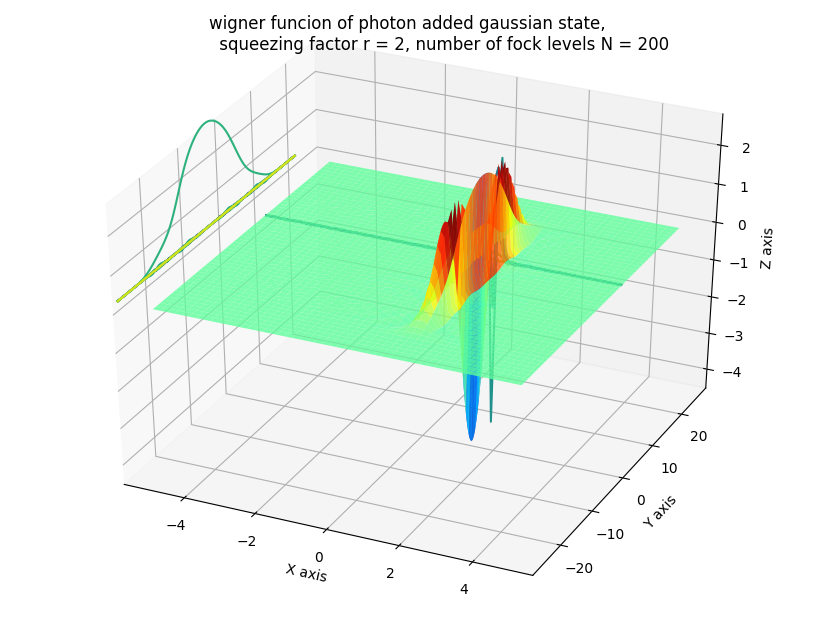

In [13]:
psiaddplot

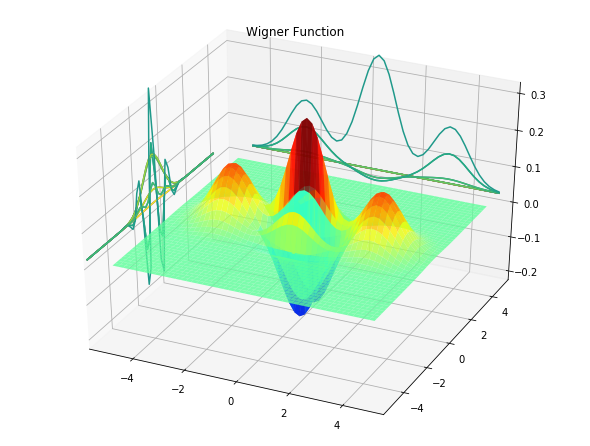

In [9]:
myplotwigner(catstate(2,np.pi /4, 0, 20))